In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
df = pd.read_csv('/content/datasetroad.csv')
df.head(20)

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
5,NaN,6,324.0,225.0,17.2,0.0,4,114,6630,1500,0.0,24.9,0.0,7,1.810
6,NaN,7,324.0,130.0,18.4,0.0,3,103,6700,1540,0.9,25.2,0.0,7,1.860
7,NaN,8,324.0,100.6,19.0,0.0,2,114,6740,1590,0.9,52.8,0.0,8,1.890
8,NaN,9,324.0,176.5,19.0,0.0,3,108,7175,1787,3.4,60.5,57.0,8,1.920
9,NaN,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960


In [4]:
df = df.drop([910,911,912,913,914,915,916,917,918])
df.fillna(0,inplace=True)

In [5]:
# Adding Section Number to all rows for that Section
j=0
for i in range(100):
  df.iloc[j:j+10,0] = df.iloc[j,0]
  j += 10

In [6]:
# Separating out Test Data ( i.e, Year 10 data for all sections )
test = df.loc[df['year']==10]

In [7]:
# Replacing the unnamed column name with 'Section'
df.columns = df.columns.str.replace('Unnamed: 0', 'Section')
test.columns = test.columns.str.replace('Unnamed: 0', 'Section')
df.head(10)

,Section,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80
5,Sec_1,6,324.0,225.0,17.2,0.0,4,114,6630,1500,0.0,24.9,0.0,7,1.81
6,Sec_1,7,324.0,130.0,18.4,0.0,3,103,6700,1540,0.9,25.2,0.0,7,1.86
7,Sec_1,8,324.0,100.6,19.0,0.0,2,114,6740,1590,0.9,52.8,0.0,8,1.89
8,Sec_1,9,324.0,176.5,19.0,0.0,3,108,7175,1787,3.4,60.5,57.0,8,1.92
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.96


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt



# Random Forest Regressor


In [9]:
rf = RandomForestRegressor(n_estimators = 1500, random_state=0)

In [10]:
col_names = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']
rf_pred = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}
etr_pred = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}

In [11]:
rf_rmse = []
n = 0
ind = 0
for j in [10, 11, 12, 13, 14]:
            rmse = 0
            cnt = 0
            for i in range(0, 1000, 10):

                x_train = df.iloc[i:i+9, 1:10]
                y_train = df.iloc[i:i+9, j]

                x_test = df.iloc[i+9, 1:10].to_numpy()
                y_test = df.iloc[i+9, j]
                
                rf.fit(x_train, y_train)

                y_pred = rf.predict(x_test.reshape(1,-1))[0]

                rf_pred[col_names[ind]].append(y_pred)
                rmse += (y_test - y_pred)**2
                cnt += 1
                n += 1

            rf_rmse.append(rmse)
            ind += 1

In [13]:
print("Total RMSE for Random Forest Regressor : \n\t",((sum(rf_rmse)/n))**0.5)

Total RMSE for Random Forest Regressor : 
	 46.91537021182344


# Extra Trees Regressor

In [24]:
etr = ExtraTreesRegressor(bootstrap=False, max_depth=None, criterion='mse', 
                    max_features='auto', max_leaf_nodes=300,
                    min_impurity_decrease=0.0, 
                    min_samples_leaf=1,
                    min_weight_fraction_leaf=0.1,oob_score=False,
                    warm_start=False)

In [27]:
etr_rmse = []
n = 0
ind = 0
for j in [10, 11, 12, 13, 14]:
    rmse = 0
    cnt = 0
    for i in range(0, 1000, 10):

        x_train = df.iloc[i:i+9, 1:10]
        y_train = df.iloc[i:i+9, j]

        x_test = df.iloc[i+9, 1:10].to_numpy()
        y_test = df.iloc[i+9, j]

        etr.fit(x_train, y_train)

        y_pred = etr.predict(x_test.reshape(1,-1))[0]

        etr_pred[col_names[ind]].append(y_pred)
        rmse += (y_test - y_pred)**2
        cnt += 1
        n += 1

    etr_rmse.append(rmse)
    ind += 1

In [28]:
print("Total RMSE for Extra Trees Regressor : \n\t",((sum(etr_rmse)/n))**0.5)

Total RMSE for Extra Trees Regressor : 
	 41.91965038616838


Extra Trees Regressor gives better Results

In [33]:
# Selecting Rows at Random 
import random
rand_rows=[]
for i in range(40):
  rand_rows.append(random.randint(0,90))

# Plots for Extra Tree Regressor

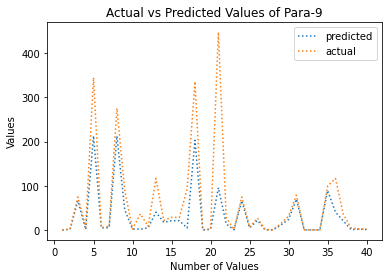

In [34]:
figsize=(13, 7)
actual = test.iloc[rand_rows,10]
predicted = pd.Series(etr_pred['Para-9']).iloc[rand_rows]
x_value = []
for i in range(len(actual)):
  x_value.append(i+1)
plt.plot(x_value,predicted, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,actual, linestyle = 'dotted', label = 'actual')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values of Para-9')
plt.legend(loc = 'upper right')
plt.show()

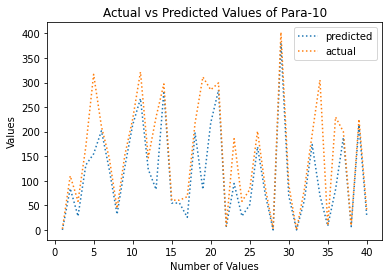

In [35]:
figsize=(13, 7)
actual = test.iloc[rand_rows,11]
predicted = pd.Series(etr_pred['Para-10']).iloc[rand_rows]
x_value = []
for i in range(len(actual)):
  x_value.append(i+1)
plt.plot(x_value,predicted, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,actual, linestyle = 'dotted', label = 'actual')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values of Para-10')
plt.legend(loc = 'upper right')
plt.show()

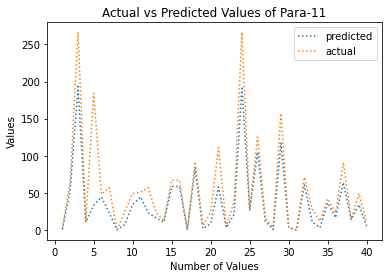

In [36]:
figsize=(13, 7)
actual = test.iloc[rand_rows,12]
predicted = pd.Series(etr_pred['Para-11']).iloc[rand_rows]
x_value = []
for i in range(len(actual)):
  x_value.append(i+1)
plt.plot(x_value,predicted, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,actual, linestyle = 'dotted', label = 'actual')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values of Para-11')
plt.legend(loc = 'upper right')
plt.show()

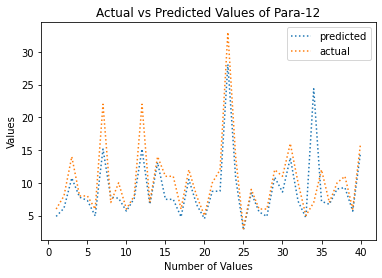

In [37]:
figsize=(13, 7)
actual = test.iloc[rand_rows,13]
predicted = pd.Series(etr_pred['Para-12']).iloc[rand_rows]
x_value = []
for i in range(len(actual)):
  x_value.append(i+1)
plt.plot(x_value,predicted, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,actual, linestyle = 'dotted', label = 'actual')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values of Para-12')
plt.legend(loc = 'upper right')
plt.show()

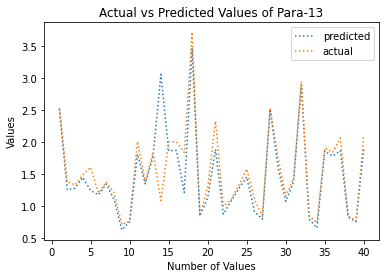

In [38]:
figsize=(13, 7)
actual = test.iloc[rand_rows,14]
predicted = pd.Series(etr_pred['Para-13']).iloc[rand_rows]
x_value = []
for i in range(len(actual)):
  x_value.append(i+1)
plt.plot(x_value,predicted, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,actual, linestyle = 'dotted', label = 'actual')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values of Para-13')
plt.legend(loc = 'upper right')
plt.show()